#01 Data Collection and Preprocessing:

Collect a labeled dataset containing images of products with various defects. Ensure that each image is labeled with the corresponding defect class.
Preprocess the images, which may include resizing, normalization, and augmentation to enhance the diversity of the dataset.

In [ ]:
# Step 1: Import Libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 1.0 Data Folder

image_dir = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image'
mask_dir = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask'

## Import


In [ ]:
import os
import glob
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Preprocess:


*   Create mask for good image
*   List item



## create mask for good image(DONE)

##Undersampling good class

##oversampling defect class (DONE)

#Summary and visualization

In [ ]:
# Summarize the number of images for each class
class_folders = os.listdir(image_dir)

for class_name in class_folders:
    class_image_paths = glob.glob(os.path.join(image_dir, class_name, '*.png'))
    class_mask_paths = glob.glob(os.path.join(mask_dir, class_name, '*.png'))

    num_image_files = len(class_image_paths)
    num_mask_files = len(class_mask_paths)

    print(f"{class_name}: {num_image_files} image files, {num_mask_files} mask files")

# # Total number of image and mask files
# total_image_files = len(image_files)
# total_mask_files = len(mask_files)
# print(f"\nTotal image files: {total_image_files}")
# print(f"Total mask files: {total_mask_files}")


.DS_Store: 0 image files, 0 mask files
scratch_head: 97 image files, 97 mask files
thread_side: 94 image files, 94 mask files
scratch_neck: 151 image files, 151 mask files
manipulated_front: 96 image files, 96 mask files
good: 361 image files, 361 mask files
thread_top: 94 image files, 94 mask files
aug_good: 211 image files, 211 mask files


## Visualize after datagen

##Define load and preprocess data

### processed good data

###processed defect data

#Merged images and masks into dataset

In [ ]:
import os
import glob
import tensorflow as tf

def load_and_preprocess_data(main_folder, class_names, batch_size, target_size):
    processed_images = []
    processed_masks = []

    for class_name in class_names:
        print(f"Processing class: {class_name}")
        # Create a list of image file paths
        image_folder = os.path.join(main_folder, 'image', class_name)
        mask_folder = os.path.join(main_folder, 'mask', class_name)

        image_files = glob.glob(os.path.join(image_folder, '*.png'))
        mask_files = glob.glob(os.path.join(mask_folder, '*.png'))

        # Check if there are files in the folders
        if not image_files or not mask_files:
            raise ValueError(f"No files found in {image_folder} or {mask_folder}")

        # Load and preprocess each image and mask pair
        for image_path, mask_path in zip(image_files, mask_files):
            image, mask = load_and_preprocess(image_path, mask_path, target_size)

            processed_images.append(image)
            processed_masks.append(mask)

    # Convert lists to TensorFlow datasets
    processed_images_dataset = tf.data.Dataset.from_tensor_slices(processed_images)
    processed_masks_dataset = tf.data.Dataset.from_tensor_slices(processed_masks)


    # # Batch and prefetch the datasets for improved performance
    # processed_images_dataset = processed_images_dataset.batch(batch_size)
    # processed_images_dataset = processed_images_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    # processed_masks_dataset = processed_masks_dataset.batch(batch_size)
    # processed_masks_dataset = processed_masks_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return processed_images_dataset, processed_masks_dataset



def load_and_preprocess(image_path, mask_path, target_size):
    # Load image and mask
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)

    # Resize image and mask
    image = tf.image.resize(image, target_size)
    mask = tf.image.resize(mask, target_size)

    # Normalize image to the range [0, 1]
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    # Normalize mask to binary values (0 or 1)
    mask = mask // 255

    return image, mask



# Specify the main directory containing subfolders (Image and mask)
main_folder = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data'

# List of defect classes
defect_classes = [
    'aug_good',
    'scratch_neck',
    'manipulated_front',
    'scratch_head',
    'thread_top',
    'thread_side',
]

# Batch size and target size
batch_size = 16
target_size = (256, 256)

# Create the datasets
processed_images, processed_masks = load_and_preprocess_data(main_folder, defect_classes, batch_size, target_size)



Processing class: aug_good
Processing class: scratch_neck
Processing class: manipulated_front
Processing class: scratch_head
Processing class: thread_top
Processing class: thread_side


In [ ]:
# Summarize the number of images for each class
class_folders = os.listdir(image_dir)

for class_name in class_folders:
    class_image_paths = glob.glob(os.path.join(image_dir, class_name, '*.png'))
    class_mask_paths = glob.glob(os.path.join(mask_dir, class_name, '*.png'))

    num_image_files = len(class_image_paths)
    num_mask_files = len(class_mask_paths)

    print(f"{class_name}: {num_image_files} image files, {num_mask_files} mask files")

# Total number of image and mask files
total_image_files = len(image_file)
total_mask_files = len(mask_file)
print(f"\nTotal image files: {total_image_files}")
print(f"Total mask files: {total_mask_files}")


.DS_Store: 0 image files, 0 mask files
scratch_head: 97 image files, 97 mask files
thread_side: 94 image files, 94 mask files
scratch_neck: 151 image files, 151 mask files
manipulated_front: 96 image files, 96 mask files
good: 361 image files, 361 mask files
thread_top: 94 image files, 94 mask files
aug_good: 211 image files, 211 mask files


NameError: ignored

In [ ]:
len(processed_images)

743

In [ ]:
len(processed_masks)

743

In [ ]:
processed_images

<_TensorSliceDataset element_spec=TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None)>

In [ ]:

import tensorflow as tf

# Assuming 'your_dataset' is your dataset
if isinstance(processed_masks, tf.data.Dataset):
    print("Your dataset is a TensorFlow dataset.")
    # You can proceed with TensorFlow dataset operations
else:
    print("Your dataset is not a TensorFlow dataset.")
    # You might need to convert it to a TensorFlow dataset or handle it differently


Your dataset is a TensorFlow dataset.


In [ ]:
import tensorflow as tf

# Convert processed_images to NumPy array
processed_images_np = np.array([item.numpy() for item in processed_images])
# Convert processed_masks to NumPy array
processed_masks_np = np.array([item.numpy() for item in processed_masks])

#02 Data 40%:

Divide your dataset into training, validation, and testing sets. This helps assess the model's performance on new, unseen data.

# 03 Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train, test, and validation sets
images_train, images_temp, masks_train, masks_temp = train_test_split(
    processed_images_np, processed_masks_np, test_size=0.2, random_state=42
)

images_val, images_test, masks_val, masks_test = train_test_split(
    images_temp, masks_temp, test_size=0.5, random_state=42
)

# Now you have images_train, masks_train for training,
# images_val, masks_val for validation, and
# images_test, masks_test for testing.


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((images_test, masks_test))

Model Selection:

Choose a suitable deep learning model architecture for your multiclass classification task. Convolutional Neural Networks (CNNs) are commonly used for computer vision tasks.

Model Design:

Design the architecture of your model.
The input layer should match the size of your preprocessed images, and the output layer should have as many nodes as the number of classes (defect types).
Loss Function:

Select a suitable loss function for multiclass classification.
Cross-entropy loss is commonly used in this context. >> use one-hot encoded
loss='sparse_categorical_crossentropy' >> use integer

Optimizer:

Choose an optimizer (e.g., Adam, SGD) to update the model's weights during training.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
import numpy as np
import torch
import torchvision.models as models

In [ ]:
def unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Contracting path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Expansive path
    up3 = layers.UpSampling2D(size=(2, 2))(conv3)
    concat3 = layers.concatenate([conv2, up3], axis=-1)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.UpSampling2D(size=(2, 2))(conv8)
    concat9 = layers.concatenate([conv1, up9], axis=-1)
    conv10 = layers.Conv2D(4, 1, activation='sigmoid')(concat9)  # 4 units for (x_min, y_min, x_max, y_max)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    return model


# Define input shape and number of classes
input_shape = (256, 256, 3)


# Create the UNet model for multiclass segmentation
model = unet_model(input_shape)


# # Assuming 'train_classes' is an array of class labels in your training dataset
# class_weights = compute_class_weight( class_weight = "balanced",
#                                       classes = np.unique(train_classes),
#                                       y = train_classes )
# class_weights = dict(zip(np.unique(train_classes), class_weights))


def compute_iou(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.math.round(y_pred), tf.float32)

    intersection = tf.reduce_sum(tf.multiply(y_true, y_pred))
    union = tf.reduce_sum(tf.add(y_true, y_pred)) - intersection

    iou = (intersection + 1e-15) / (union + 1e-15)

    return iou

def iou_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred - y_true * y_pred, axis=[1, 2, 3])
    iou = tf.reduce_mean((intersection + 1e-15) / (union + 1e-15), axis=0)
    return 1 - iou




In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers

# def unet_model_4(input_shape):
#     inputs = tf.keras.Input(shape=input_shape)

#     # Contracting path
#     conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
#     conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
#     pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
#     conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
#     pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

#     # Bottleneck
#     conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
#     conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

#     # Expansive path
#     up3 = layers.UpSampling2D(size=(2, 2))(conv3)
#     concat3 = layers.concatenate([conv2, up3], axis=-1)
#     conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat3)
#     conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

#     up9 = layers.UpSampling2D(size=(2, 2))(conv8)
#     concat9 = layers.concatenate([conv1, up9], axis=-1)
#     conv10 = layers.Conv2D(2, 1, activation='linear')(concat9)  # 4 units for (x_min, y_min, x_max, y_max)

#     model = tf.keras.Model(inputs=inputs, outputs=conv10)
#     return model

# # Define input shape and number of classes
# input_shape = (256, 256, 3)

# # Create the UNet model for multiclass segmentation
# model = unet_model_4(input_shape)

# def compute_iou(y_true, y_pred):
#     y_true = tf.cast(y_true, tf.float32)
#     y_pred = tf.cast(tf.math.round(y_pred), tf.float32)

#     intersection = tf.reduce_sum(tf.multiply(y_true, y_pred))
#     union = tf.reduce_sum(tf.add(y_true, y_pred)) - intersection

#     iou = (intersection + 1e-15) / (union + 1e-15)

#     return iou

# def iou_loss(y_true, y_pred):
#     intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
#     union = tf.reduce_sum(y_true + y_pred - y_true * y_pred, axis=[1, 2, 3])
#     iou = tf.reduce_mean((intersection + 1e-15) / (union + 1e-15), axis=0)
#     return 1 - iou



In [ ]:
# Compile the model
learning_rate = 0.001
num_epochs = 5
optimizer = Adam(learning_rate=learning_rate)
# Compile the model
model.compile(optimizer=optimizer, loss=iou_loss, metrics=['accuracy',compute_iou])


In [ ]:
# # Compile the model
# learning_rate = 0.1
# num_epochs = 3
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(optimizer=optimizer, loss=iou_loss, metrics=['accuracy'])


In [ ]:

# Assuming 'images_train' and 'masks_train' are your training data


history = model.fit(images_train, masks_train, validation_data = (images_val, masks_val), epochs=num_epochs)
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]


Epoch 1/5
19/19 [==============================] - 256s 13s/step - loss: 0.5682 - accuracy: 0.3908 - compute_iou: 0.4635 - val_loss: 0.4321 - val_accuracy: 0.4321 - val_compute_iou: 0.5525
Epoch 2/5
19/19 [==============================] - 252s 13s/step - loss: 0.4490 - accuracy: 0.4490 - compute_iou: 0.5524 - val_loss: 0.4321 - val_accuracy: 0.4321 - val_compute_iou: 0.5525
Epoch 3/5
19/19 [==============================] - 253s 13s/step - loss: 0.4490 - accuracy: 0.4490 - compute_iou: 0.5473 - val_loss: 0.4321 - val_accuracy: 0.4321 - val_compute_iou: 0.5525
Epoch 4/5
19/19 [==============================] - 253s 13s/step - loss: 0.4490 - accuracy: 0.4490 - compute_iou: 0.5537 - val_loss: 0.4321 - val_accuracy: 0.4321 - val_compute_iou: 0.5525
Epoch 5/5
19/19 [==============================] - 259s 14s/step - loss: 0.4490 - accuracy: 0.4490 - compute_iou: 0.5537 - val_loss: 0.4321 - val_accuracy: 0.4321 - val_compute_iou: 0.5525


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:


# # Example: Load your training data (images and masks) here
# # Replace this with your actual data loading code
# train_images = images_train
# train_masks = masks_train

# # Example: Iterate through epochs and batches
# epochs = 1
# batch_size = 16

# for epoch in range(epochs):
#     print(f"Epoch {epoch + 1}/{epochs}")

#     for step in range(0, len(train_images), batch_size):
#         batch_images = train_images[step:step + batch_size]
#         batch_masks = train_masks[step:step + batch_size]

#         # Train the model on the batch
#         model.train_on_batch(batch_images, batch_masks)

#         # Assuming you have a validation set, you can compute IOU on it
#         # Example: Load your validation data (val_images and val_masks) here
#         # Replace this with your actual data loading code
#         val_images = images_val
#         val_masks = masks_val

#         # Evaluate the model on the validation set and get the IOU value
#         val_iou = model.evaluate(val_images, val_masks, verbose=0)[2]  # Assuming IOU is the third metric

#         print(f"Step {step}/{len(train_images)}, Validation IOU: {val_iou}")

# Now you have the list of IOU values during training.
# Depending on your training loop structure, you might want to store them in a list or another suitable data structure.

#model.fit(images_train, masks_train, validation_data=(images_val, masks_val), epochs=num_epochs, batch_size=batch_size)

In [ ]:
# Evaluate the model using IoU (Intersection over Union) as the metric
test_loss, test_accuracy, test_iou = model.evaluate(images_test, masks_test)

3/3 [==============================] - 5s 1s/step - loss: 0.7964 - accuracy: 0.0106 - compute_iou: 0.2435


In [ ]:
model.save('/content/model8.h5')

In [ ]:
# Assuming `model` is your trained model
predictions = model.predict(images_test)


3/3 [==============================] - 5s 1s/step


In [ ]:
predicted_mask = predictions[0]

In [ ]:
predicted_mask

array([[[9.5649824e-02, 9.9927098e-01, 9.9946976e-01, 1.0000000e+00],
        [8.4783687e-11, 9.3511301e-01, 8.0584091e-01, 9.9995822e-01],
        [2.0572275e-15, 1.3532947e-01, 3.2903889e-01, 9.9999982e-01],
        ...,
        [9.1684678e-16, 3.2552892e-01, 6.7449951e-01, 1.0000000e+00],
        [6.6075732e-14, 3.9470731e-03, 2.1191683e-02, 9.9719948e-01],
        [9.9608386e-13, 1.2098853e-02, 9.9494898e-01, 9.9904221e-01]],

       [[9.9998903e-01, 3.2178253e-02, 9.9999964e-01, 9.9999994e-01],
        [3.2239887e-01, 6.2767933e-05, 1.1174257e-04, 3.7233180e-01],
        [1.5718724e-05, 2.8923520e-07, 3.4421003e-08, 9.9992871e-01],
        ...,
        [6.6511357e-06, 1.0383230e-06, 1.7374524e-07, 9.9999768e-01],
        [4.6200554e-07, 6.0045089e-08, 2.3286461e-08, 2.3207199e-04],
        [4.7340372e-09, 1.2198217e-04, 9.7536063e-01, 9.8378271e-01]],

       [[9.9976689e-01, 7.5298291e-01, 1.0000000e+00, 1.0000000e+00],
        [9.6711177e-01, 3.1008217e-03, 6.8694025e-01, 5.9735

In [ ]:
# # Iterate through the predictions
# for i, bounding_box in enumerate(predictions):
#     # Assuming bounding_box is a tuple of two points: (x1, y1), (x2, y2)
#     pt1 = (int(bounding_box[0][0]), int(bounding_box[0][1]))
#     pt2 = (int(bounding_box[1][0]), int(bounding_box[1][1]))

#     # Draw the bounding box on the image
#     image = cv2.rectangle(image, pt1, pt2, color, thickness)


TypeError: ignored

In [ ]:
threshold = 0.5  # Adjust this threshold based on your model's behavior
y_pred = (predictions > threshold).astype(int)


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming `model` is your trained model
# Assuming `compute_iou` is your IoU function

# Load the image you want to test (assuming images_test is a NumPy array)
image_to_test = images_test[0]

# Expand the dimensions to match the input shape expected by the model
image_to_test = np.expand_dims(image_to_test, axis=0)

# Get the predicted mask for the image
predicted_mask = model.predict(image_to_test)

# Assuming ground truth mask for the first image is available as well
ground_truth_mask = masks_test[0]  # Replace this with your actual ground truth data

# Calculate IoU
iou = compute_iou(ground_truth_mask, predicted_mask)

print("IoU for the first image:", iou.numpy())


1/1 [==============================] - 0s 88ms/step
IoU for the first image: 1.32016685e-20


In [ ]:
y_pred

In [ ]:

predicted_masks = model.predict(images_test)

predicted_masks[predicted_masks >= 0.5] = 1
predicted_masks[predicted_masks < 0.5] = 0

3/3 [==============================] - 6s 2s/step


In [ ]:
predicted_masks

array([[[[0., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 0., 0., 1.],
         ...,
         [0., 0., 1., 1.],
         [0., 0., 0., 1.],
         [0., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [0., 0., 0., 0.],
         [0., 0., 0., 1.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 0., 0.],
         [0., 0., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 0., 1., 1.],
         [0., 0., 0., 1.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 0., 0.],
         [0., 0., 1., 1.]],

        ...,

        [[1., 1., 1., 1.],
         [1., 0., 0., 1.],
         [1., 0., 0., 1.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 0., 0.],
         [0., 0., 1., 0.]],

        [[1., 0., 1., 1.],
         [1., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 1.]],

        [[1., 1., 1., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 1.],
         ...,
 

In [ ]:
iou = compute_iou(y_true, y_pred)

In [ ]:
iou_values = [calculate_iou(masks_test[i], y_pred[i]) for i in range(len(masks_test))]


NameError: ignored

In [ ]:
print("IoU values:", iou_values)

IoU values: [0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.000946044921875, 1.0, 1.0, 1.0, 1.0, 0.00274658203125, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.00616455078125, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0037384033203125, 1.0, 0.0030059814453125, 1.0, 0.0015869140625, 1.0, 1.0, 0.0, 0.0023651123046875, 0.0, 0.003631591796875, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0035247802734375, 1.0, 0.0, 0.002227783203125, 1.0, 1.0, 0.0, 0.0033416748046875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.004180908203125, 0.0, 1.0, 0.0, 0.0]


1/1 [==============================] - 0s 94ms/step
4.0422808e-14
255.0
(array([4.0422808e-14, 5.9655412e-14, 8.1957770e-14, ..., 2.5499997e+02,
       2.5499998e+02, 2.5500000e+02], dtype=float32), array([  1,   1,   1, ..., 249, 154, 792]))


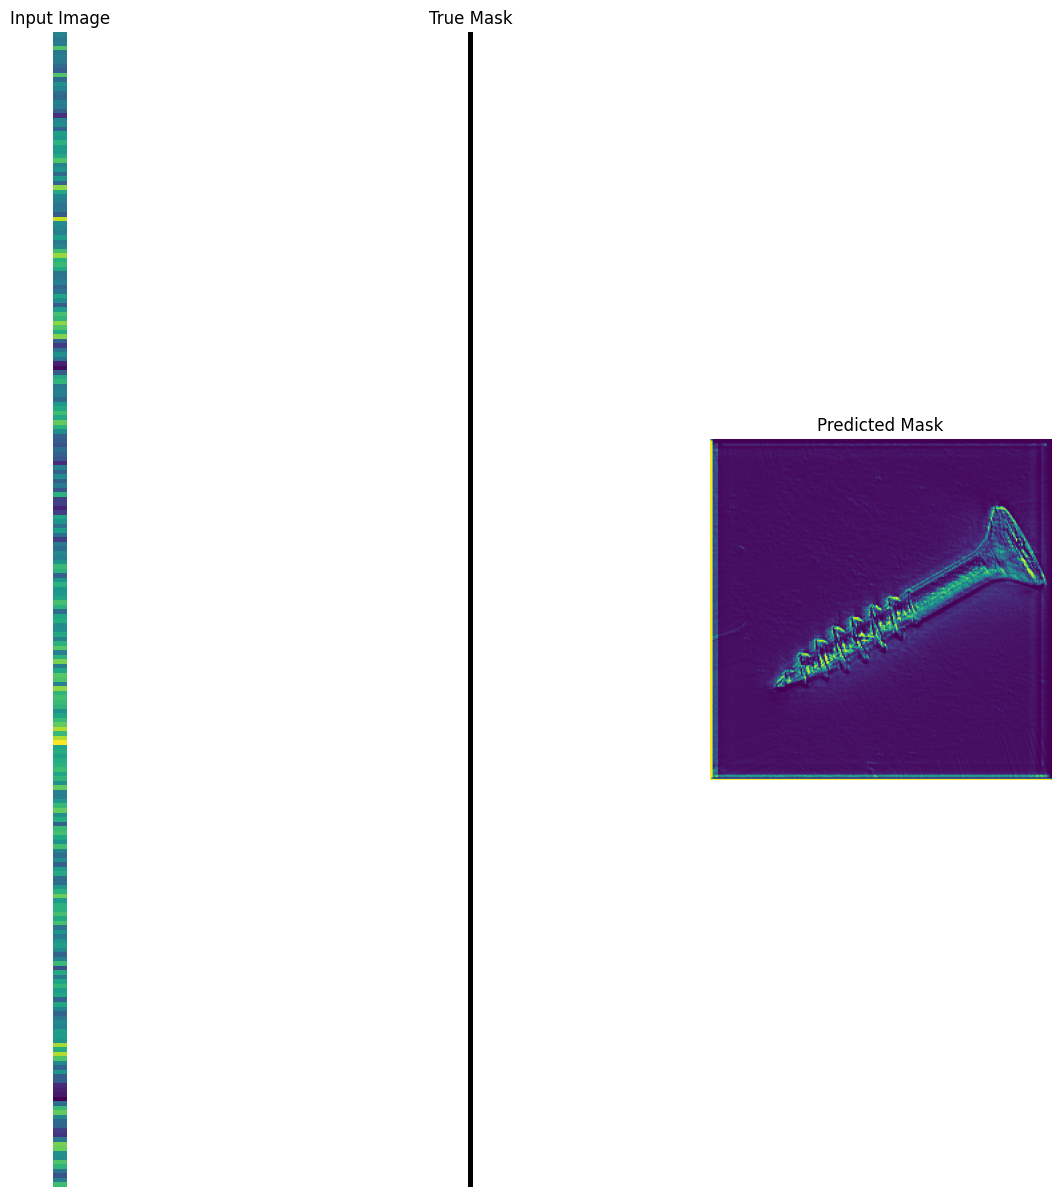

1/1 [==============================] - 0s 91ms/step
4.301902e-14
255.0
(array([4.3019021e-14, 4.3520970e-14, 7.6746179e-14, ..., 2.5499997e+02,
       2.5499998e+02, 2.5500000e+02], dtype=float32), array([  1,   1,   1, ..., 396, 173, 909]))


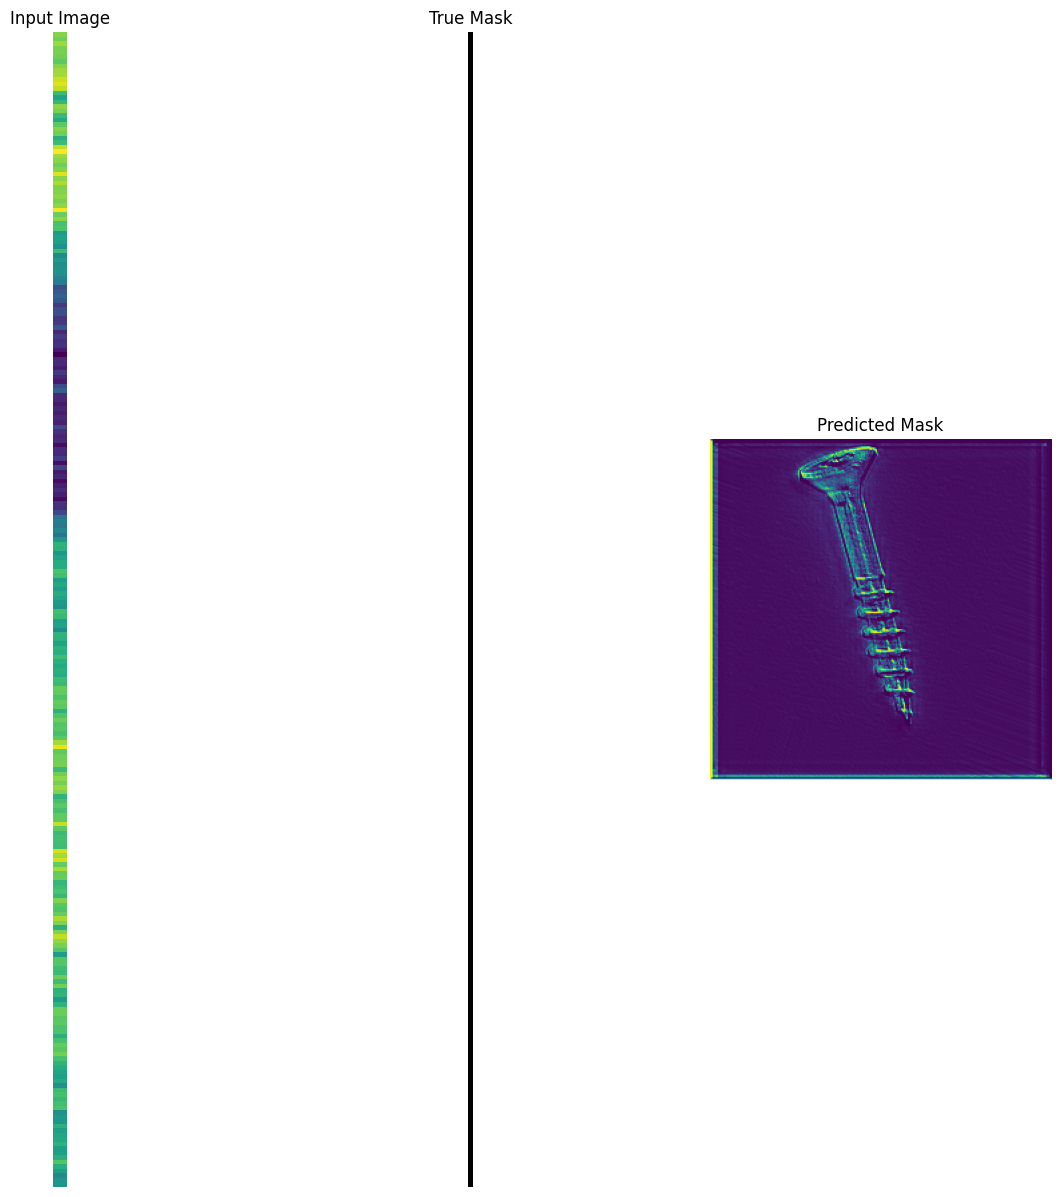

1/1 [==============================] - 0s 89ms/step
6.968494e-14
255.0
(array([6.9684940e-14, 7.2092790e-14, 8.6460048e-14, ..., 2.5499997e+02,
       2.5499998e+02, 2.5500000e+02], dtype=float32), array([  1,   1,   1, ..., 251, 120, 876]))


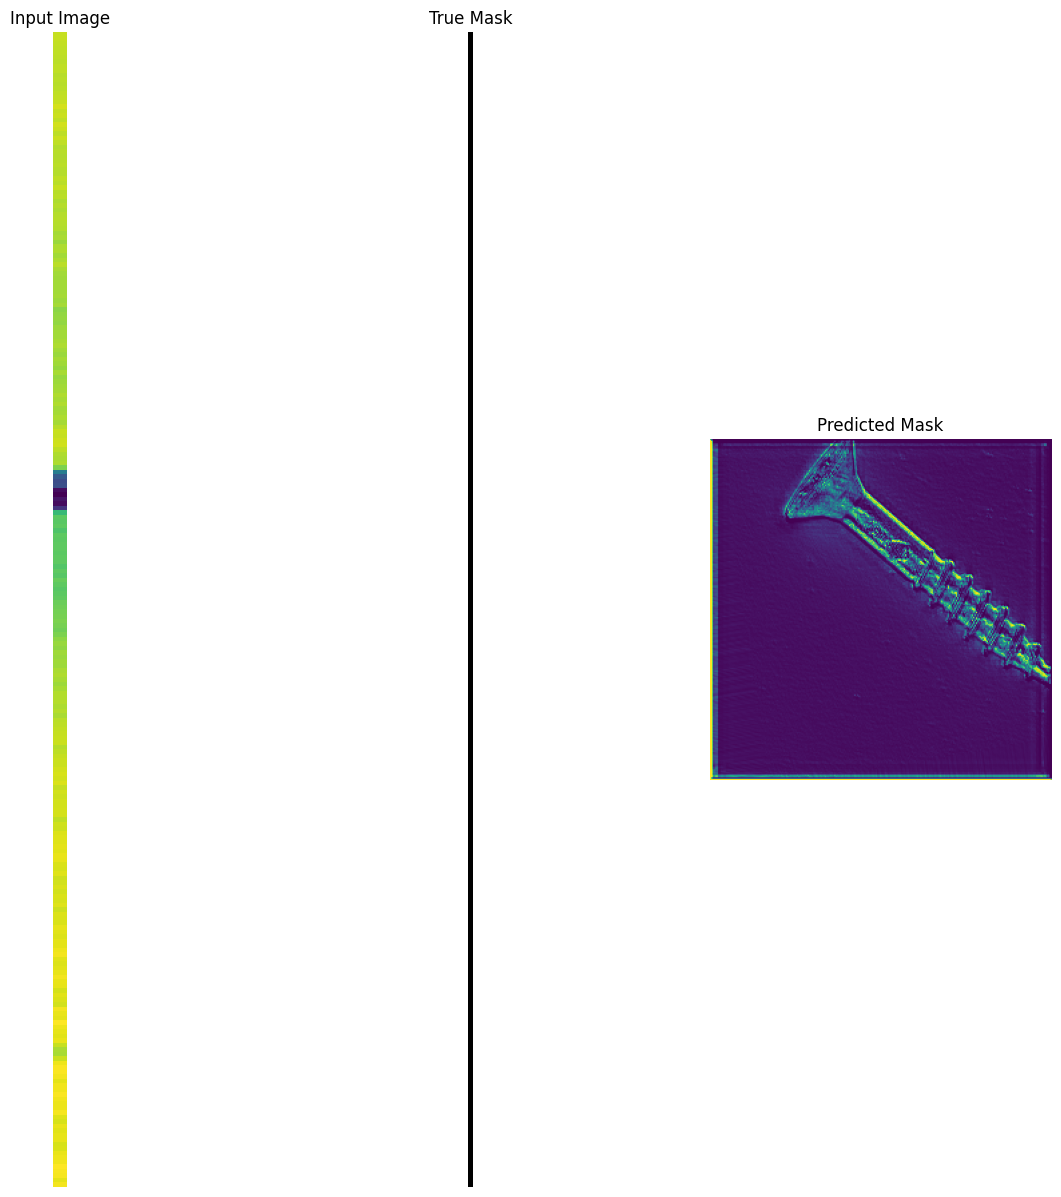

In [ ]:
def display(display_list):
    fig, axes = plt.subplots(1, len(display_list), figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        axes[i].imshow(display_list[i], cmap='gray' if i == 1 else 'viridis')  # Use 'gray' colormap for masks
        axes[i].set_title(title[i])
        axes[i].axis('off')
    plt.show()

def show_predictions(dataset=None, num=1):
    for image, mask in dataset.take(num):
        pred_mask = model.predict(tf.expand_dims(image, axis=0))
        pred_mask *= 255.0

        # Ensure pred_mask has the correct shape (rank-3 with channel dimension)
        pred_mask_3d = pred_mask[0, ..., 0]

        print(pred_mask.min())
        print(pred_mask.max())
        print(np.unique(pred_mask, return_counts=True))
        display([image[0], mask[0], pred_mask_3d])

show_predictions(test_dataset, 3)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined your model and test_dataset

def load_and_preprocess(image_path, mask_path, target_size=(256, 256)):
    # Load and resize image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)  # Resize image
    image = image / 255.0  # Normalize to [0, 1]

    # Load and resize mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, target_size)  # Resize mask
    mask = mask // 255  # Convert to binary mask (0 or 1)

    return image, mask

# Modify the show_predictions function
def show_predictions(dataset=None, num=1):
    for image_path, mask_path in dataset.take(num):
        # Convert image_path and mask_path to strings
        image_path_str = image_path[0].numpy().decode('utf-8')
        mask_path_str = mask_path[0].numpy().decode('utf-8')

        # Load and preprocess image and mask
        image, mask = load_and_preprocess(image_path_str, mask_path_str)

        pred_mask = model.predict(tf.expand_dims(image, axis=0))
        pred_mask *= 255.0

        # Ensure pred_mask has the correct shape (rank-3 with channel dimension)
        pred_mask_3d = pred_mask[0, ..., 0]

        print(pred_mask.min())
        print(pred_mask.max())
        print(np.unique(pred_mask, return_counts=True))
        display([image.numpy(), mask.numpy(), pred_mask_3d.numpy()])

# Assuming you have already defined the display function

# Call the show_predictions function with the updated dataset
show_predictions(test_dataset, 3)




AttributeError: ignored

Training:

Train the model using the training set. Adjust the hyperparameters such as learning rate, batch size, and the number of epochs to achieve good performance. Monitor the training process using the validation set to avoid overfitting.

# New section

In [ ]:
##plot learning curve

plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0,2])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: ignored

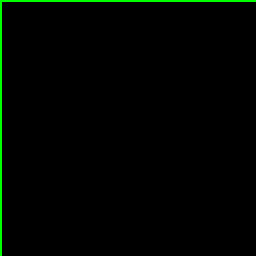

In [ ]:
import tensorflow as tf
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image


def compute_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    return intersection / union

def load_mask(mask_path):
    # Implement your logic to load the mask from the given path
    # For example, you can use OpenCV to read the mask image
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    return mask
def tf_visualize_segmentation(model, image_path, mask_path, iou_threshold=0.5):
    # Load the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    image_array = tf.keras.preprocessing.image.img_to_array(img)
    image_array = image_array / 255.0  # Normalize the pixel values to [0, 1]

    # Convert NumPy array to TensorFlow tensor outside @tf.function
    image_tensor = tf.convert_to_tensor(np.expand_dims(image_array, axis=0), dtype=tf.float32)

    # Make predictions using your model
    @tf.function
    def predict_fn(image_tensor):
        return model(image_tensor)

    predictions = predict_fn(image_tensor)

    # Load the ground truth mask
    ground_truth_mask = load_mask(mask_path)

    # Apply softmax thresholding to create a binary mask for each class
    softmax_thresholded = (predictions > 0.5).numpy().astype(np.uint8)

    # Resize the predicted mask to match the ground truth mask size
    softmax_thresholded_resized = cv2.resize(softmax_thresholded[0, :, :, 0], (ground_truth_mask.shape[1], ground_truth_mask.shape[0]))

    # Check if contours are not None
    contours, _ = cv2.findContours(softmax_thresholded_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours is not None and len(contours) > 0:
        # Compute IoU
        iou = compute_iou(ground_truth_mask, softmax_thresholded_resized)

        # Draw bounding box if IoU is above the threshold
        if iou > iou_threshold:
            for contour in contours:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(image_array, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Visualize the result using cv2_imshow
    cv2_imshow(cv2.cvtColor(image_array.astype(np.uint8), cv2.COLOR_RGB2BGR))

    return result_image

def compute_iou(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.math.round(y_pred), tf.float32)

    intersection = tf.reduce_sum(tf.multiply(y_true, y_pred))
    union = tf.reduce_sum(tf.add(y_true, y_pred)) - intersection

    iou = (intersection + 1e-15) / (union + 1e-15)

    return iou

def iou_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred - y_true * y_pred, axis=[1, 2, 3])
    iou = tf.reduce_mean((intersection + 1e-15) / (union + 1e-15), axis=0)
    return 1 - iou

# Test the model on
trained_model = tf.keras.models.load_model('/content/model7.h5', custom_objects={'iou_loss': iou_loss, 'compute_iou': compute_iou})
new_image_path = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/data/test_image/defect_scratch_head_003.png'
mask_path = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/data/test_mask/defect_scratch_head_003.png'

result_image = tf_visualize_segmentation(model, new_image_path, mask_path, iou_threshold=0.5)




In [ ]:
import cv2
import numpy as np





# Load the image
image_path = r'/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/image/raw_data/scratch_neck/007.png'
image = cv2.imread(image_path)

# Assuming you have a function to load the ground truth mask, modify this accordingly
ground_truth_mask_path = image_path.replace('.png', '_mask.png')
ground_truth_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)

# Assuming softmax_thresholded is your predicted mask
softmax_thresholded = (predictions > 0.2).numpy().astype(np.uint8)

# Resize the predicted mask to match the ground truth mask size
softmax_thresholded_resized = cv2.resize(softmax_thresholded, (ground_truth_mask.shape[1], ground_truth_mask.shape[0]))

# Compute IoU
iou = compute_iou(softmax_thresholded_resized, ground_truth_mask)
print(f'IoU for the image: {iou}')


NameError: ignored

In [ ]:
def calculate_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    iou = intersection / union
    return iou

# Assuming y_true and y_pred are your ground truth and predicted masks
y_true = np.array([0, 1, 1, 0, 1, 0], dtype=bool).reshape(2, 3)
y_pred = np.array([1, 1, 0, 0, 1, 0], dtype=bool).reshape(2, 3)

# Calculate IoU for each bounding box
iou_values = []
for i in range(y_true.shape[0]):
    iou = calculate_iou(y_true[i], y_pred[i])
    iou_values.append(iou)

print("IoU values:", iou_values)


IoU values: [0.3333333333333333, 1.0]


# Visualization

In [ ]:
print(selected_boxes)

[]


In [ ]:
# Check if the image is loaded successfully
print(image)


None


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/001.jpg"
label_image_semantic = "/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/001.png"

fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

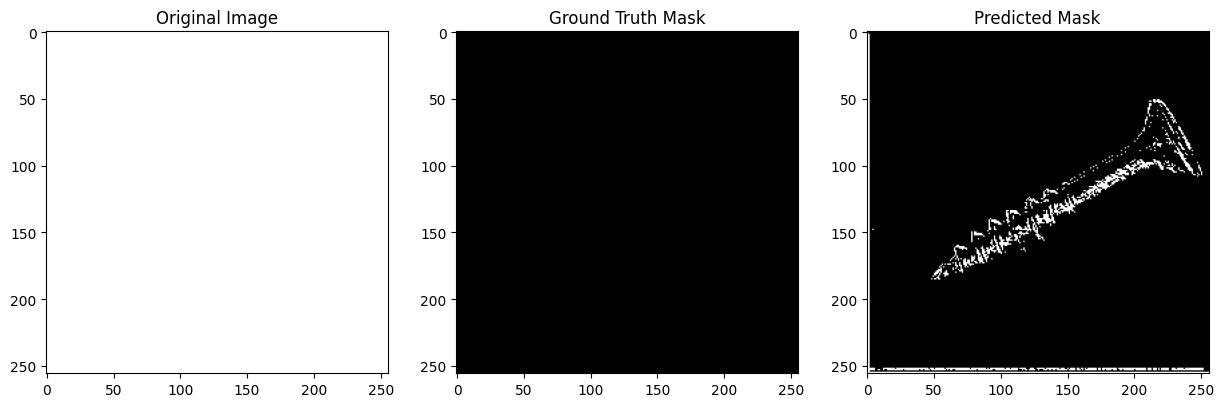

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_defect_detection(original_image, mask, predicted_mask_channel):
    # Adjust the figure size based on the number of subplots
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    # Display the ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(mask), cmap='gray')
    plt.title('Ground Truth Mask')

    # Display the chosen channel of the predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask_channel, cmap='gray')
    plt.title('Predicted Mask')

    plt.show()

# Example usage
index = 0  # Choose the index of the sample you want to visualize
original_image = images_test[index]
ground_truth_mask = masks_test[index]

# Placeholder for the predicted mask (replace this with your model prediction)
predicted_mask_placeholder = predicted_masks[0]

# Choose the channel you want to visualize (for example, channel 0)
predicted_mask_channel = predicted_mask_placeholder[:, :, 0]

visualize_defect_detection(original_image, ground_truth_mask, predicted_mask_channel)


1/1 [==============================] - 0s 91ms/step


TypeError: ignored

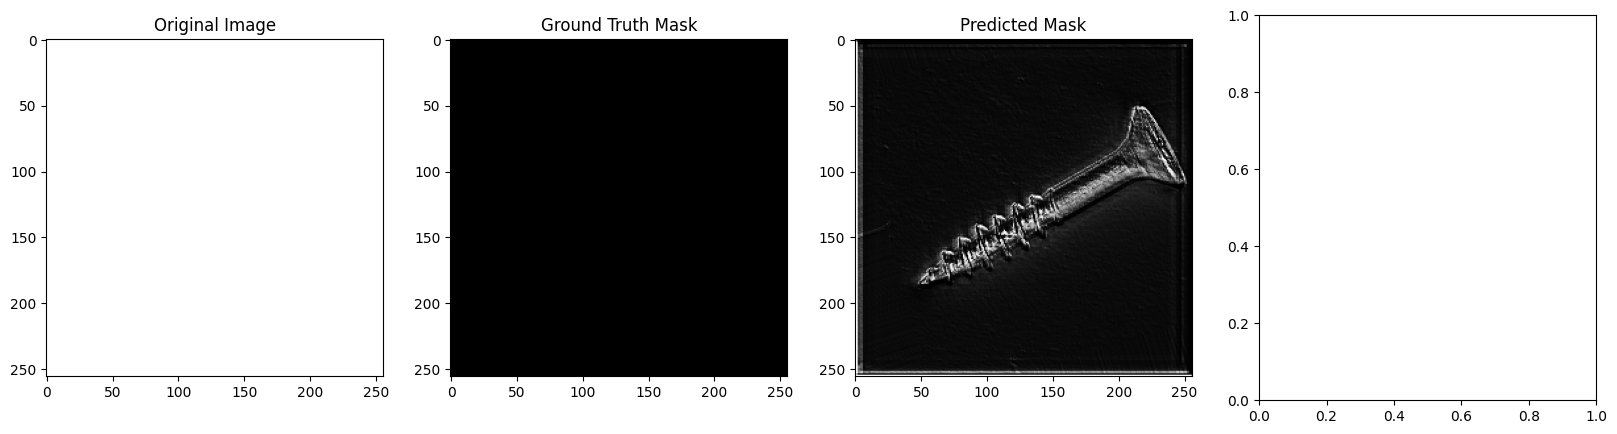

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_defect_detection(original_image, ground_truth_mask, predicted_mask, predicted_mask_channel, iou):
    # Adjust the figure size based on the number of subplots
    plt.figure(figsize=(20, 5))

    # Display the original image
    plt.subplot(1, 4, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    # Display the ground truth mask
    plt.subplot(1, 4, 2)
    plt.imshow(np.squeeze(ground_truth_mask), cmap='gray')
    plt.title('Ground Truth Mask')

    # Display the chosen channel of the predicted mask
    plt.subplot(1, 4, 3)
    plt.imshow(predicted_mask_channel, cmap='gray')
    plt.title('Predicted Mask')

    # Display IoU value
    plt.subplot(1, 4, 4)
    plt.text(0.5, 0.5, f'IoU: {iou:.2f}', fontsize=12, ha='center', va='center')
    plt.axis('off')

    plt.show()

# Example usage
index = 0  # Choose the index of the sample you want to visualize
original_image = images_test[index]
ground_truth_mask = masks_test[index]  # Replace with your actual ground truth data
predicted_mask = model.predict(np.expand_dims(original_image, axis=0))[0]
predicted_mask_channel = predicted_mask[:, :, 0]
iou = [0.3333333333333333, 1.0]  # Replace with your actual IoU value

visualize_defect_detection(original_image, ground_truth_mask, predicted_mask, predicted_mask_channel, iou)


In [ ]:

# importing cv2
import cv2

# path
path = r'C:\Users\Rajnish\Desktop\geeksforgeeks\geeks.png'

# Reading an image in default mode
image = cv2.imread(path)

# Window name in which image is displayed
window_name = 'Image'

# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (5, 5)

# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (220, 220)

# Blue color in BGR
color = (255, 0, 0)

# Line thickness of 2 px
thickness = 2

# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)

# Displaying the image
cv2.imshow(window_name, image)

In [ ]:
mask_folder

PosixPath('/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask')

In [ ]:
import os
import random
from google.colab.patches import cv2_imshow

# Paths and naming convention
image_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/manipulated_front"
mask_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/manipulated_front"
mask_suffix = "_mask.png"

# Randomly select an image
chosen_image_file = random.choice(os.listdir(image_path))

# Extract image filename without extension
chosen_image_name = os.path.splitext(chosen_image_file)[0]

# Generate corresponding ground truth mask filename
chosen_mask_file = chosen_image_name + mask_suffix

# Construct full paths
full_image_path = os.path.join(image_path, chosen_image_file)
full_mask_path = os.path.join(mask_path, chosen_mask_file)

# Read images as NumPy arrays
image = cv2.imread(full_image_path)
mask = cv2.imread(full_mask_path)

# Convert mask to a grayscale image for better visualization
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Resize mask to match image dimensions (if necessary)
if mask.shape[:2] != image.shape[:2]:
    mask = cv2.resize(mask, dsize=image.shape[:2])

# Concatenate images side-by-side
combined_image = cv2.hconcat([image, mask])

# Show the combined image
cv2_imshow(combined_image, title=f"Original Image & Ground Truth Mask: {chosen_image_file}")

# Optionally, save the chosen image path and mask path for reference
print(f"Randomly chosen image: {chosen_image_file}")
print(f"Corresponding ground truth mask: {chosen_mask_file}")


error: ignored

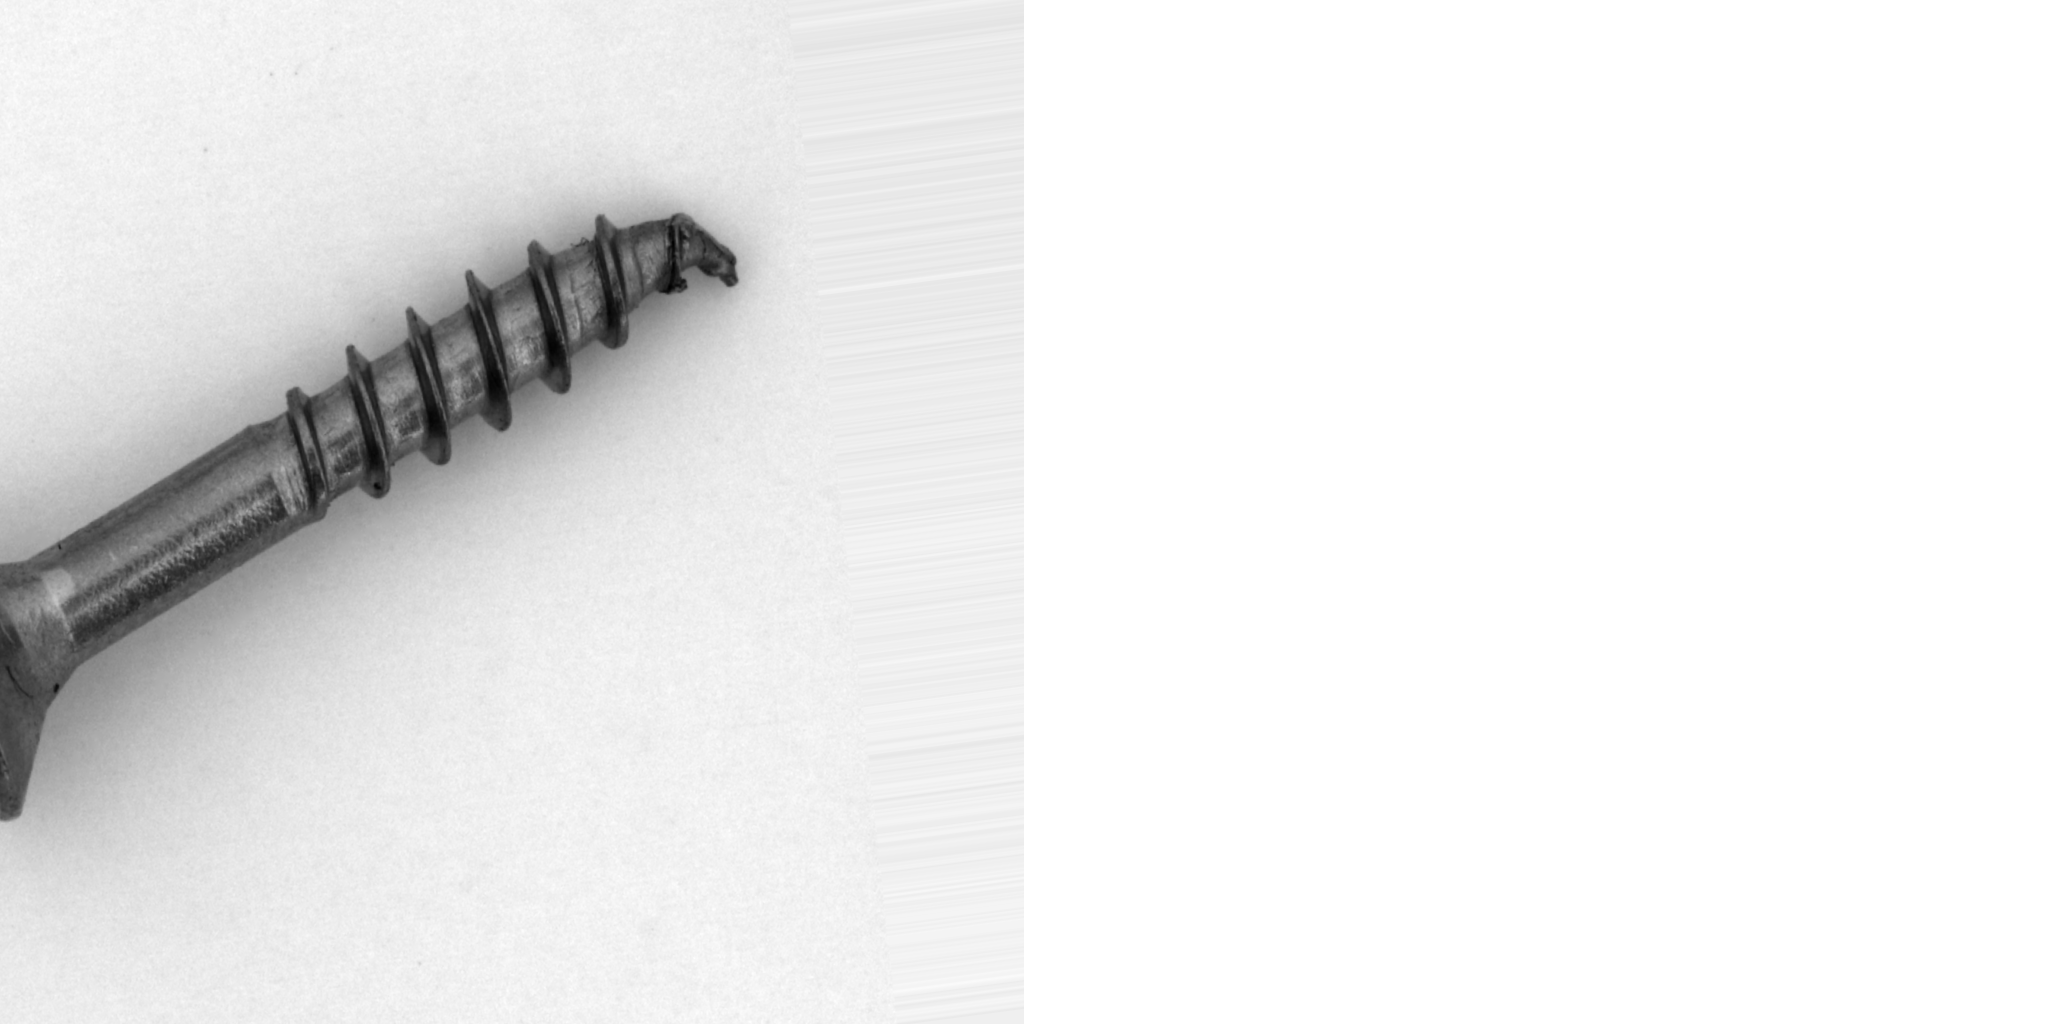

Randomly chosen image: aug_0_8024.png
Corresponding ground truth mask: aug_0_8024_mask.png


In [ ]:
import os
import random
from google.colab.patches import cv2_imshow

# Paths and naming convention
image_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/manipulated_front"
mask_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/manipulated_front"
mask_suffix = "_mask.png"

# Randomly select an image
chosen_image_file = random.choice(os.listdir(image_path))

# Extract image filename without extension
chosen_image_name = os.path.splitext(chosen_image_file)[0]

# Generate corresponding ground truth mask filename
chosen_mask_file = chosen_image_name + mask_suffix

# Construct full paths
full_image_path = os.path.join(image_path, chosen_image_file)
full_mask_path = os.path.join(mask_path, chosen_mask_file)

# Read images as NumPy arrays
image = cv2.imread(full_image_path)
mask = cv2.imread(full_mask_path)

# Resize mask to match image dimensions (if necessary)
if mask.shape[:2] != image.shape[:2]:
    mask = cv2.resize(mask, dsize=image.shape[:2])

# Concatenate images side-by-side
combined_image = cv2.hconcat([image, mask])

# Show the combined image
cv2_imshow(combined_image)

# Optionally, save the chosen image path and mask path for reference
print(f"Randomly chosen image: {chosen_image_file}")
print(f"Corresponding ground truth mask: {chosen_mask_file}")


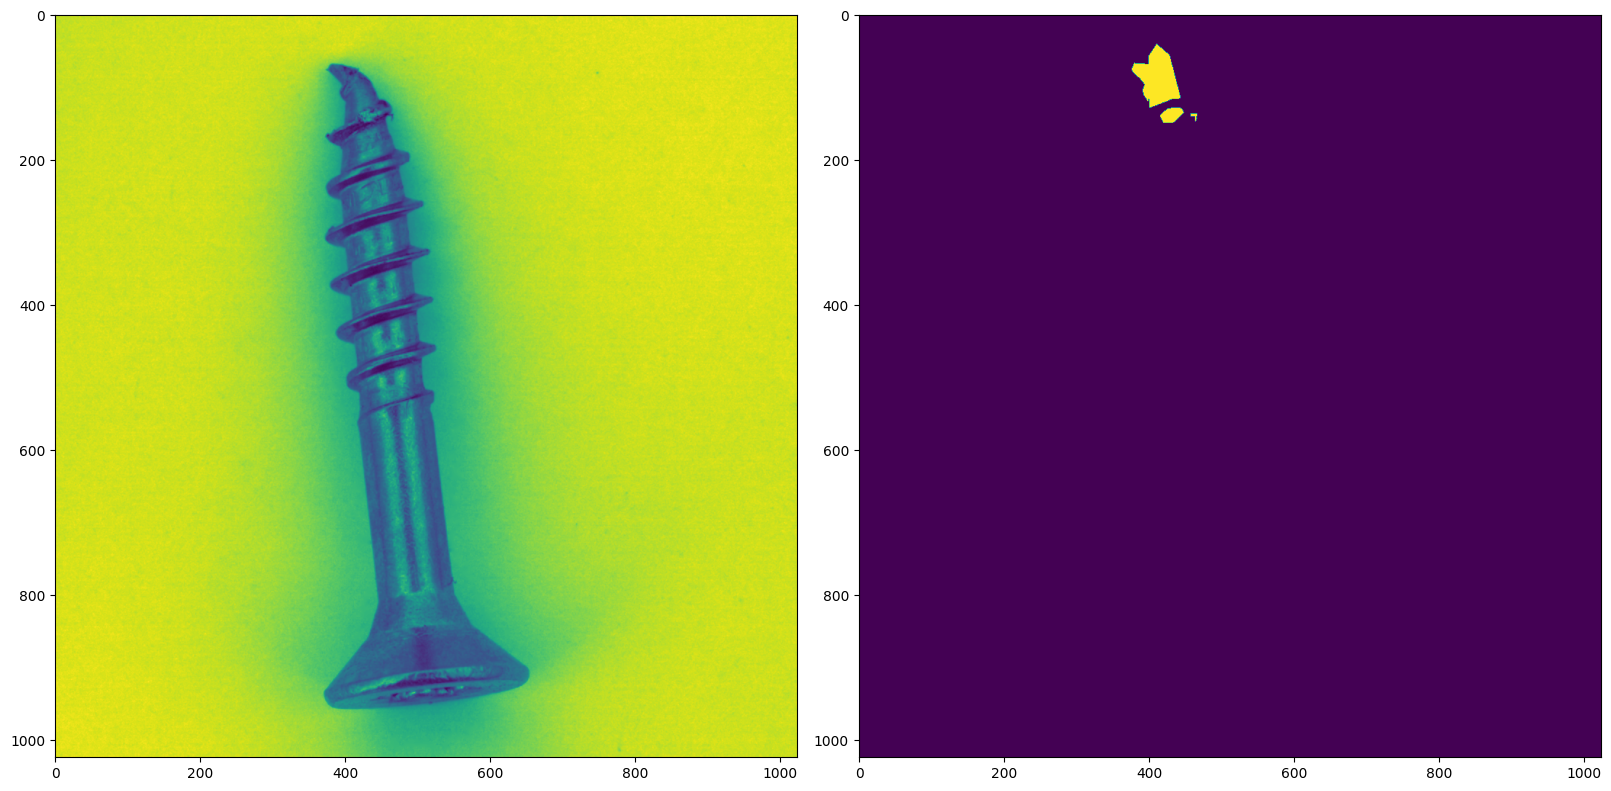

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
original_image = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/manipulated_front/008.png'

label_image_semantic = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/manipulated_front/008_mask.png'

fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

1/1 [==============================] - 0s 92ms/step
No matching mask found for /content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/manipulated_front/aug_0_5620.png
IoU for the image: 0.046524677


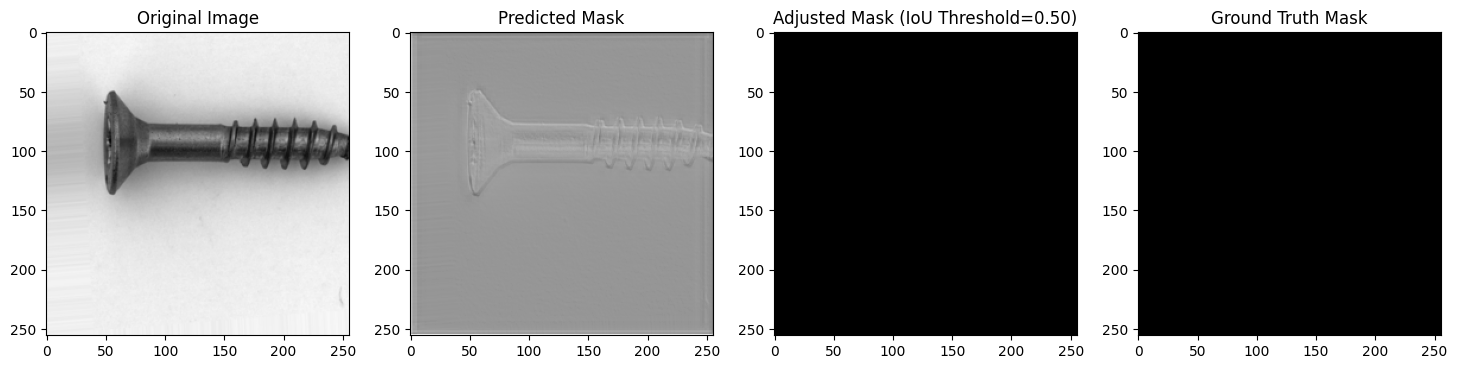

In [ ]:
import random
import glob
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Specify the directory paths
image_directory = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/manipulated_front'
mask_directory = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/manipulated_front'

# Get a list of image paths in the directory
image_paths = glob.glob(image_directory + '/*.png')  # Assuming the images are in PNG format

# Check if there are any images in the directory
if not image_paths:
    print("No images found in the specified directory.")
else:
    # Generate a random index within the valid range
    index = random.randint(0, len(image_paths) - 1)

    original_image_path = image_paths[index]
    original_image = Image.open(original_image_path)

    # Resize the image to match the expected input shape of the model
    resized_image = original_image.resize((256, 256))

    # Convert the resized image to a NumPy array and expand dimensions
    input_image = np.expand_dims(np.array(resized_image), axis=0)

    # Normalize the input image (assuming the model expects pixel values in the range [0, 1])
    input_image = input_image / 255.0

    # Get the predicted mask
    predicted_mask = model.predict(input_image)[0]

    # Ensure the predicted mask has a single channel
    predicted_mask = predicted_mask[:, :, 0]

    ground_truth_mask_paths = glob.glob(os.path.join(mask_directory, '*_mask.png'))

    # Extract the filename with extension from the original image path
    image_filename_with_extension = os.path.basename(original_image_path)

    # Find the corresponding ground truth mask
    matching_mask_paths = [path for path in ground_truth_mask_paths if os.path.basename(path) == image_filename_with_extension]

    if not matching_mask_paths:
        print(f"No matching mask found for {original_image_path}")
    else:
        # Take the first matching mask path (you can modify this logic if there are multiple matches)
        ground_truth_mask_path = matching_mask_paths[0]
        ground_truth_mask = Image.open(ground_truth_mask_path)


    # Resize the ground truth mask to match the predicted mask
    resized_ground_truth_mask = ground_truth_mask.resize((256, 256))

    # Convert the ground truth mask to a NumPy array
    ground_truth_mask_array = np.array(resized_ground_truth_mask)

    # Calculate IoU
    iou = compute_iou(ground_truth_mask_array, predicted_mask)

    print("IoU for the image:", iou.numpy())

    # Threshold the predicted mask based on the IoU value
    threshold = 0.5  # You can adjust this threshold based on your needs
    adjusted_mask = np.where(iou > threshold, predicted_mask, 0)

    # Visualize the original image, predicted mask, adjusted mask, and ground truth mask
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(resized_image)
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(predicted_mask, cmap='gray')
    plt.title('Predicted Mask')

    plt.subplot(1, 4, 3)
    plt.imshow(adjusted_mask, cmap='gray')
    plt.title('Adjusted Mask (IoU Threshold={:.2f})'.format(threshold))

    plt.subplot(1, 4, 4)
    plt.imshow(resized_ground_truth_mask, cmap='gray')
    plt.title('Ground Truth Mask')

    plt.show()


1/1 [==============================] - 0s 96ms/step


<ipython-input-82-c6011c5d44fb>:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  original_image.thumbnail((256, 256), Image.ANTIALIAS)


IoU for the image: 0.29110718


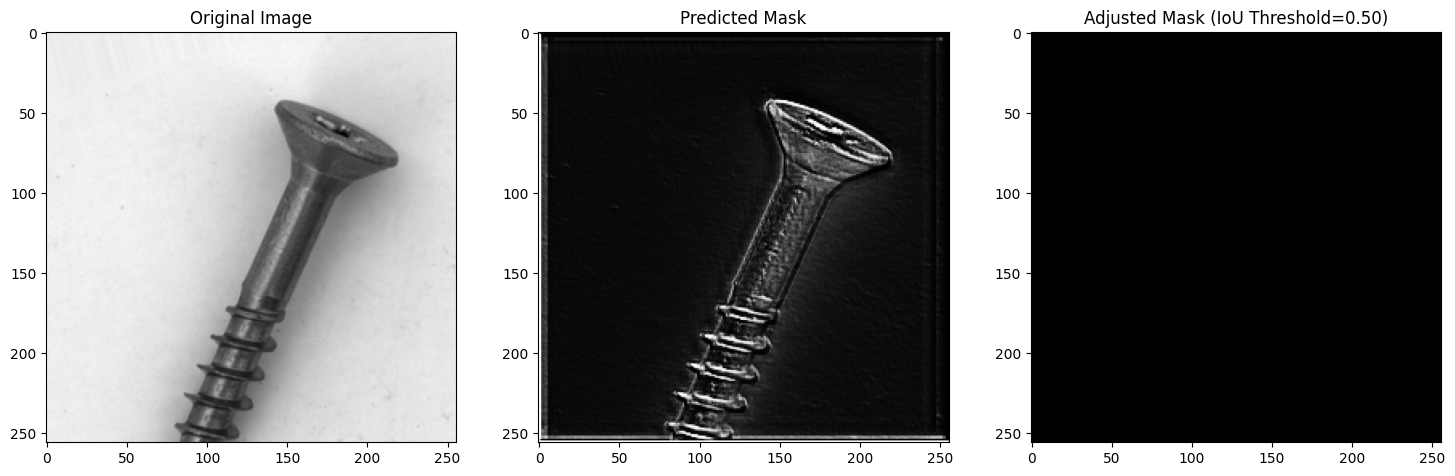

In [ ]:
import random
import glob
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Specify the directory path
image_directory = '/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/manipulated_front'

# Get a list of image paths in the directory
image_paths = glob.glob(image_directory + '/*.png')  # Assuming the images are in PNG format

# Check if there are any images in the directory
if not image_paths:
    print("No images found in the specified directory.")
else:
    # Generate a random index within the valid range
    index = random.randint(0, len(image_paths) - 1)

    original_image_path = image_paths[index]
    original_image = Image.open(original_image_path)

    # Resize the image to match the expected input shape of the model
    original_image.thumbnail((256, 256), Image.ANTIALIAS)

    # Convert the resized image to a NumPy array and expand dimensions
    input_image = np.expand_dims(np.array(original_image), axis=0)

    # Get the predicted mask
    predicted_mask = model.predict(input_image)[0]

    # Assuming ground truth mask for the first image is available as well
    ground_truth_mask = masks_test[index]  # Replace this with your actual ground truth data

    # Calculate IoU
    iou = compute_iou(ground_truth_mask, predicted_mask)

    print("IoU for the image:", iou.numpy())

    # Threshold the predicted mask based on the IoU value
    threshold = 0.5  # You can adjust this threshold based on your needs
    adjusted_mask = np.where(iou > threshold, predicted_mask, 0)

    # Visualize the original image, predicted mask, and adjusted mask
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(predicted_mask[:, :, 0], cmap='gray')
    plt.title('Predicted Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(adjusted_mask[:, :, 0], cmap='gray')
    plt.title('Adjusted Mask (IoU Threshold={:.2f})'.format(threshold))

    plt.show()


In [ ]:
def display(display_list):
    fig = plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img
        (display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(dataset=None, num=1):
    for image, mask in dataset.take(num):
        pred_mask = model.predict(image)
        pred_mask *= 255.0
        print(pred_mask.min())
        print(pred_mask.max())
        print(np.unique(pred_mask, return_counts=True))
        display([image[0], mask[0], pred_mask[0]])

show_predictions(test_dataset, 3)
Share
Follow


In [ ]:
import os
import random
from google.colab.patches import cv2_imshow

# Paths and naming convention
image_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/image/manipulated_front"
mask_path = "/content/drive/MyDrive/Colab Notebooks/screw_semantic_segmentation/raw_data/mask/manipulated_front"
mask_suffix = "_mask.png"

# Randomly select an image
chosen_image_file = random.choice(os.listdir(image_path))

# Extract image filename without extension
chosen_image_name = os.path.splitext(chosen_image_file)[0]

# Generate corresponding ground truth mask filename
chosen_mask_file = chosen_image_name + mask_suffix

# Construct full paths
full_image_path = os.path.join(image_path, chosen_image_file)
full_mask_path = os.path.join(mask_path, chosen_mask_file)

# Read images as NumPy arrays
image = cv2.imread(full_image_path)
mask = cv2.imread(full_mask_path)


# Reshape the mask to match the image dimensions with a dummy channel (grayscale to RGB)
mask = np.expand_dims(mask, axis=-1)  # Repeat mask values across third dimension
mask = np.repeat(mask, 3, axis=-1)  # Duplicate each channel to create a 3-channel image
print(f"Mask reshaped to: {mask.shape}")


# Check mask dimensions and convert if necessary
if mask.shape[:2] != image.shape[:2]:
    mask = cv2.resize(mask, dsize=image.shape[:2])


# Check & convert mask to grayscale if needed
if mask.ndim != 2:
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Try hconcat with checks
try:
    combined_image = cv2.hconcat([image, mask])
except Exception as e:
    print(f"Error during hconcat: {e}")
    # Handle error gracefully (e.g., show separate images)

# Show combined image if successful
if combined_image is not None:
    cv2_imshow(combined_image)

# Optionally, save the chosen image path and mask path for reference
print(f"Randomly chosen image: {chosen_image_file}")
print(f"Corresponding ground truth mask: {chosen_mask_file}")


Mask reshaped to: (512, 512, 3, 3)


error: ignored

In [ ]:
print(f"Image dimensions: {image.shape}")
print(f"Image data type: {image.dtype}")
print(f"Mask dimensions: {mask.shape}")
print(f"Mask data type: {mask.dtype}")

Image dimensions: (1024, 1024, 3)
Image data type: uint8
Mask dimensions: (1024, 1024)
Mask data type: uint8


In [ ]:
len(image_path)

NameError: ignored

In [ ]:
---